In [1]:
# import libraries and set display options
import pandas as pd
import pprint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# set frame width and center output
from IPython.core.display import display, HTML
display(HTML("""
<style>
.container {width:84% !important;
}
</style>
"""))

# pretty print options
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# open file
x_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")
# strip brackets and trailing space from country names
# replace remaining space with underscore
# lower case all column names
x_rates.columns = x_rates.columns.str.replace("[","").str.replace("]","")
x_rates.columns = x_rates.columns.str.rstrip()
x_rates.columns = x_rates.columns.str.replace(" ","_")
x_rates.columns = x_rates.columns.str.lower()

# rename columns
x_rates.rename(columns={"period\\unit:":"date",
                        "chinese_yuan_renminbi":"chinese_yuan",
                        "uk_pound_sterling":"uk_pound"}, inplace=True)

# convert datetime
x_rates["date"] = pd.to_datetime(x_rates["date"])

# resort and reindex
x_rates.sort_values("date", inplace=True)
x_rates.reset_index(drop=True, inplace=True)

# convert hyphens in currency columns to NaN

x_rates = x_rates.replace("-", np.nan)

# convert exchange rate values to float
x_rates.iloc[:,1:] = x_rates.iloc[:,1:].astype(float)

display(x_rates.head())

/var/folders/bz/5cj1tzbj5xn319rpqrw6gpmh0000gn/T/ipykernel_20460/3498817066.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x_rates.columns = x_rates.columns.str.replace("[","").str.replace("]","")


,date,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan,cypriot_pound,czech_koruna,danish_krone,estonian_kroon,uk_pound,greek_drachma,hong_kong_dollar,croatian_kuna,hungarian_forint,indonesian_rupiah,israeli_shekel,indian_rupee,iceland_krona,japanese_yen,korean_won,lithuanian_litas,latvian_lats,maltese_lira,mexican_peso,malaysian_ringgit,norwegian_krone,new_zealand_dollar,philippine_peso,polish_zloty,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.5823,35.1070,7.4501,15.6466,0.7111,327.1500,9.1332,NaN,251.4800,"9,433.6100",NaN,NaN,81.4800,133.7300,"1,398.5900",4.7170,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.5100,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.9910,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.5823,34.9170,7.4495,15.6466,0.7122,324.7000,9.1341,NaN,250.8000,"9,314.5100",NaN,NaN,81.5300,130.9600,"1,373.0100",4.7174,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.7450,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.8480,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.5820,34.8500,7.4452,15.6466,0.7076,324.7200,9.1010,NaN,250.6700,"9,337.6800",NaN,NaN,81.5400,131.4200,"1,359.5400",4.6994,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.8720,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.7780,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.5819,34.8860,7.4431,15.6466,0.7058,324.4000,9.0131,NaN,250.0900,"9,218.7700",NaN,NaN,81.0600,129.4300,"1,337.1600",4.6548,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.4360,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.7650,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.5819,34.9380,7.4433,15.6466,0.7094,324.0000,9.0302,NaN,250.1500,"9,321.6300",NaN,NaN,80.9900,130.0900,"1,366.7300",4.6643,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.2950,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.5600,42.5590,0.3718,1.1659,6.7855


In [2]:
# create a list of data frames for each currency with log rate of the exchange rate, 30 day rolling mean, and year
df_dict = {}
for currency in x_rates.columns[1:]:
    df_name = currency
    df = x_rates[["date", currency]].copy()
    df["rolling_mean_30"] = df[currency].rolling(30).mean()
    df_dict[currency] = df

# create a stand-alone date series
chart_date = (x_rates["date"])

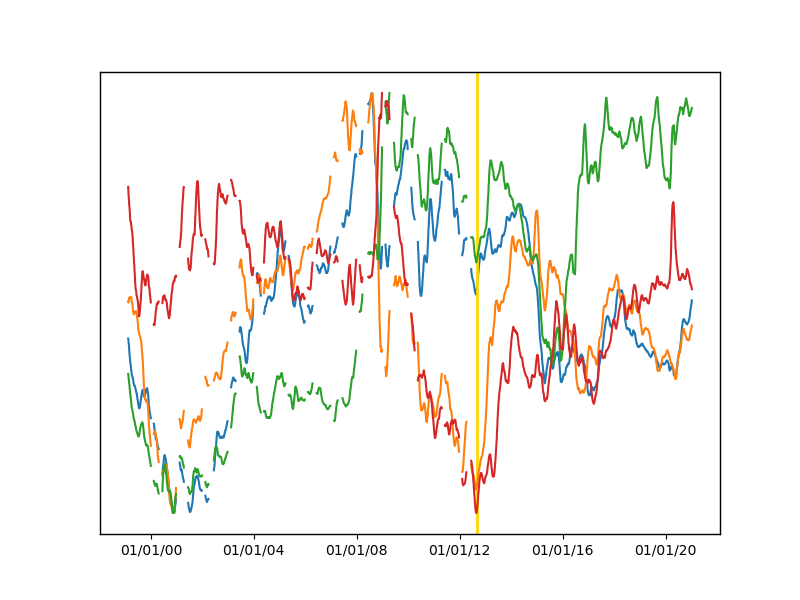

In [3]:
# line graph showing Euro to four high frequency trading pairs overlapped
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,6))
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()
line = ax.plot(chart_date, df_dict["us_dollar"]["rolling_mean_30"],
               'tab:blue')
line_1 = ax1.plot(chart_date, df_dict["japanese_yen"]["rolling_mean_30"],
                  'tab:orange')
line_2 = ax2.plot(chart_date, df_dict["uk_pound"]["rolling_mean_30"],
                  'tab:green')
line_3 = ax3.plot(chart_date, df_dict["australian_dollar"]["rolling_mean_30"],
                  'tab:red')
ax.axvline(x=chart_date.iloc[3560], color="gold", linewidth=2) # vline to highlight point on chart
for ax in ax, ax1, ax2, ax3:
    ax.set(yticks=[])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
plt.show()

In [4]:
display(chart_date.iloc[0])
display(chart_date.iloc[701])
display(chart_date.iloc[2499])
display(chart_date.iloc[3560])

Timestamp('1999-01-04 00:00:00')

Timestamp('2001-09-11 00:00:00')

Timestamp('2008-08-01 00:00:00')

Timestamp('2012-08-27 00:00:00')

In [5]:
display(chart_date)

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
5      1999-01-11
6      1999-01-12
7      1999-01-13
8      1999-01-14
9      1999-01-15
10     1999-01-18
11     1999-01-19
12     1999-01-20
13     1999-01-21
14     1999-01-22
15     1999-01-25
16     1999-01-26
17     1999-01-27
18     1999-01-28
19     1999-01-29
20     1999-02-01
21     1999-02-02
22     1999-02-03
23     1999-02-04
24     1999-02-05
25     1999-02-08
26     1999-02-09
27     1999-02-10
28     1999-02-11
29     1999-02-12
30     1999-02-15
31     1999-02-16
32     1999-02-17
33     1999-02-18
34     1999-02-19
35     1999-02-22
36     1999-02-23
37     1999-02-24
38     1999-02-25
39     1999-02-26
40     1999-03-01
41     1999-03-02
42     1999-03-03
43     1999-03-04
44     1999-03-05
45     1999-03-08
46     1999-03-09
47     1999-03-10
48     1999-03-11
49     1999-03-12
50     1999-03-15
51     1999-03-16
52     1999-03-17
53     1999-03-18
54     1999-03-19
55     199